In [260]:
from sklearn.metrics import accuracy_score
from itertools import combinations
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [261]:


# List of base models 
base_models = ['vader','textblob','bert','flair']

# Generate all possible combinations of base models
ensemble_combinations = []
for r in range(1, len(base_models) + 1):
    ensemble_combinations.extend(combinations(base_models, r))

# Store each ensemble as a list
ensembles = []
for combination in ensemble_combinations:
    ensembles.append(np.array(combination))

In [262]:
mmscaler = MinMaxScaler()
logmodel = LogisticRegression()

In [263]:
column_list = ['Headline','vader','textblob','bert','flair','Sentiment']
x_column_list = ['vader','textblob','bert','flair']#,'vader_polarity','textblob_polarity','bert_polarity','flair_polarity']
data_list = ['sentiment140','conversational','amazon','semeval','newsheadline']
df_full = pd.DataFrame(columns=column_list)


    

In [264]:
ens = []
for i in range(15):
    ens.append(ensembles[i])
result_ensembles = pd.DataFrame(ens)

In [265]:


for data_name in data_list:
    dataset_analysis = pd.read_csv(data_name+'_test_results.csv')
    df_temp = dataset_analysis[column_list]

    X = df_temp[x_column_list]
    y = df_temp['Sentiment']
    acc_sc_en = []



    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_t = X_train
    X_te = X_test
    y_t = y_train
    y_te = y_test

    for i in range(15):
        X_train = X_t[ensembles[i]]
        X_test = X_te[ensembles[i]]
        y_train = y_t
        y_test = y_te
        X_train = mmscaler.fit_transform(X_train)
        X_test = mmscaler.fit_transform(X_test)
        logmodel.fit(X_train,y_train)
        preds = logmodel.predict(X_test)
        acc_ensemble = accuracy_score(y_test,preds)
        acc_sc_en.append(acc_ensemble)
    


    result_ensembles[data_name]=acc_sc_en
#result_ensembles.sort_values(by = 'Accuracy_semeval',ascending=False)



In [266]:
def concatenate_columns(row):
    non_null_values = [str(val) for val in row if not pd.isnull(val)]
    return ', '.join(non_null_values)

result_ensembles['Ensemble'] = result_ensembles[[0,1,2,3]].apply(concatenate_columns, axis=1)

In [267]:
result_ensembles[data_list]

,sentiment140,conversational,amazon,semeval,newsheadline
0,0.663333,0.773333,0.715000,0.671815,0.646667
1,0.621667,0.758333,0.746667,0.617761,0.531667
2,0.721667,0.838333,0.866667,0.874517,0.688333
3,0.698333,0.775000,0.926667,0.743243,0.658333
4,0.660000,0.793333,0.756667,0.669884,0.646667
5,0.715000,0.861667,0.866667,0.878378,0.706667
6,0.738333,0.803333,0.926667,0.760618,0.681667
7,0.730000,0.850000,0.866667,0.874517,0.688333
8,0.705000,0.803333,0.926667,0.741313,0.658333
9,0.751667,0.863333,0.930000,0.866795,0.683333


In [268]:
result_ensembles['Avg_accuracy'] = result_ensembles[data_list].apply(lambda x : x.mean(),axis=1)

In [269]:
result_ensembles.sort_values(by="Avg_accuracy",ascending=False)

,0,1,2,3,sentiment140,conversational,amazon,semeval,newsheadline,Ensemble,Avg_accuracy
14,vader,textblob,bert,flair,0.766667,0.865000,0.928333,0.868726,0.715000,"vader, textblob, bert, flair",0.828745
12,vader,bert,flair,None,0.763333,0.863333,0.928333,0.864865,0.713333,"vader, bert, flair",0.826640
13,textblob,bert,flair,None,0.755000,0.865000,0.928333,0.866795,0.686667,"textblob, bert, flair",0.820359
9,bert,flair,None,None,0.751667,0.863333,0.930000,0.866795,0.683333,"bert, flair",0.819026
5,vader,bert,None,None,0.715000,0.861667,0.866667,0.878378,0.706667,"vader, bert",0.805676
10,vader,textblob,bert,None,0.715000,0.845000,0.866667,0.884170,0.710000,"vader, textblob, bert",0.804167
7,textblob,bert,None,None,0.730000,0.850000,0.866667,0.874517,0.688333,"textblob, bert",0.801903
2,bert,None,None,None,0.721667,0.838333,0.866667,0.874517,0.688333,bert,0.797903
11,vader,textblob,flair,None,0.745000,0.806667,0.926667,0.762548,0.680000,"vader, textblob, flair",0.784176
6,vader,flair,None,None,0.738333,0.803333,0.926667,0.760618,0.681667,"vader, flair",0.782124


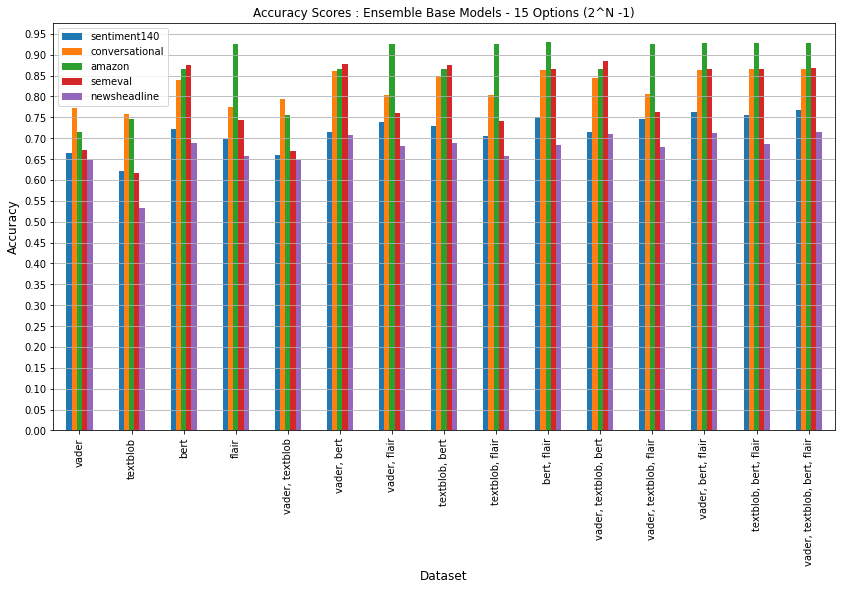

In [289]:
ax = result_ensembles.plot(x="Ensemble", y=["sentiment140","conversational","amazon","semeval","newsheadline"],kind="bar",figsize=(14,7.5))
#ax.legend(["Log_reg_meta","GBoost_meta","VADER","TextBlob","Flair","BERT"],loc = 'upper left',fontsize=11)
ax.set_xlabel('Dataset', fontsize=12)  # Change label and font size
ax.set_ylabel('Accuracy', fontsize=12)  # Change label and font size
ax.set_title('Accuracy Scores : Ensemble Base Models - 15 Options (2^N -1)')
y_ticks = [(i*.05) for i in range(0,20)]
ax.set_yticks(y_ticks)
ax.yaxis.grid(True)
# Increase font size of tick labels

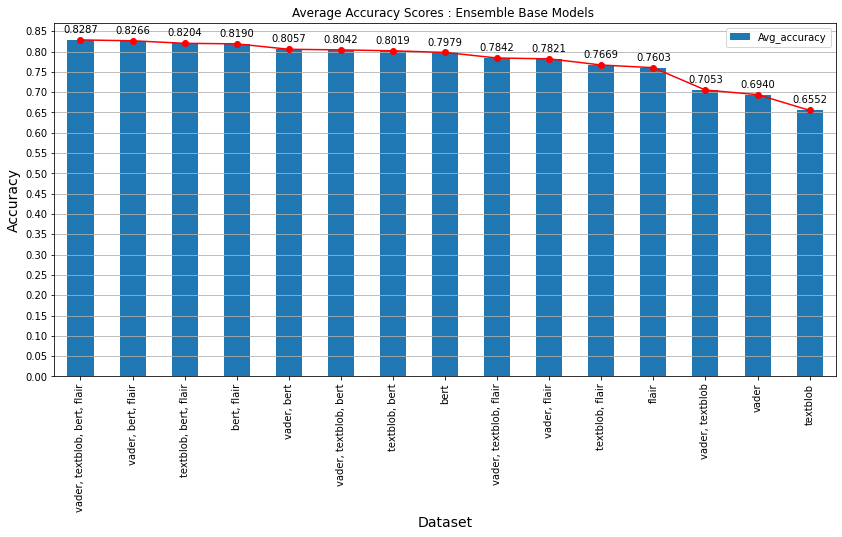

In [290]:
df1 = result_ensembles.sort_values(by='Avg_accuracy',ascending=False)
#df1['Avg_accuracy'] = df1['Avg_accuracy']-.65
ax = df1.plot(x="Ensemble", y=["Avg_accuracy"],kind="bar",figsize=(14,6.5))
#ax = result_ensembles.sort_values(by='Avg_accuracy',ascending=False).plot(x="Ensemble", y=["Avg_accuracy"],kind="bar",figsize=(14,6.5))
#ax.legend(["Log_reg_meta","GBoost_meta","VADER","TextBlob","Flair","BERT"],loc = 'upper left',fontsize=11)
ax.set_xlabel('Dataset', fontsize=14)  # Change label and font size
ax.set_ylabel('Accuracy', fontsize=14)  # Change label and font size
ax.set_title('Average Accuracy Scores : Ensemble Base Models ')
y_ticks = [(i*.05) for i in range(0,20)]
ax.set_yticks(y_ticks)
ax.yaxis.grid(True)
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.plot(df1['Ensemble'], df1['Avg_accuracy'], color='red', marker='o', label='Line Plot')
# Increase font size of tick labels

In [291]:
df1

,0,1,2,3,sentiment140,conversational,amazon,semeval,newsheadline,Ensemble,Avg_accuracy
14,vader,textblob,bert,flair,0.766667,0.865000,0.928333,0.868726,0.715000,"vader, textblob, bert, flair",0.828745
12,vader,bert,flair,None,0.763333,0.863333,0.928333,0.864865,0.713333,"vader, bert, flair",0.826640
13,textblob,bert,flair,None,0.755000,0.865000,0.928333,0.866795,0.686667,"textblob, bert, flair",0.820359
9,bert,flair,None,None,0.751667,0.863333,0.930000,0.866795,0.683333,"bert, flair",0.819026
5,vader,bert,None,None,0.715000,0.861667,0.866667,0.878378,0.706667,"vader, bert",0.805676
10,vader,textblob,bert,None,0.715000,0.845000,0.866667,0.884170,0.710000,"vader, textblob, bert",0.804167
7,textblob,bert,None,None,0.730000,0.850000,0.866667,0.874517,0.688333,"textblob, bert",0.801903
2,bert,None,None,None,0.721667,0.838333,0.866667,0.874517,0.688333,bert,0.797903
11,vader,textblob,flair,None,0.745000,0.806667,0.926667,0.762548,0.680000,"vader, textblob, flair",0.784176
6,vader,flair,None,None,0.738333,0.803333,0.926667,0.760618,0.681667,"vader, flair",0.782124


In [307]:
data_list = ['sentiment140','conversational','amazon','semeval','newsheadline'] #,'fusion']
df_temp1 = pd.read_csv('sst2_model_eval.csv')
df_model_eval=pd.DataFrame(columns=df_temp1.columns)
for data_name in data_list:
    df_temp1 = pd.read_csv(data_name+'_model_eval.csv')
    df_temp1['Dataset'] = data_name
    df_temp1['Rank'] = df_temp1['Mean_Score'].rank(ascending = False)
    df_model_eval = pd.concat([df_model_eval,df_temp1],axis=0)


In [308]:
df_model_eval

,Unnamed: 0,Model,Mean_Score,Dataset,Rank
0,0,Logistic Regression,0.752857,sentiment140,1.5
1,0,Support Vector Machine,0.742143,sentiment140,4.0
2,0,Random Forest,0.733571,sentiment140,6.0
3,0,Naive Bayes,0.743571,sentiment140,3.0
4,0,Decision Tree,0.670714,sentiment140,8.0
5,0,Gradient Boosting,0.732143,sentiment140,7.0
6,0,AdaBoost,0.737857,sentiment140,5.0
7,0,Ridge Classifier,0.752857,sentiment140,1.5
0,0,Logistic Regression,0.884286,conversational,3.5
1,0,Support Vector Machine,0.881429,conversational,5.0


In [309]:
df_model_eval.groupby('Model')['Mean_Score'].mean()

Model
AdaBoost                  0.829069
Decision Tree             0.788461
Gradient Boosting         0.832845
Logistic Regression       0.829629
Naive Bayes               0.825215
Random Forest             0.826861
Ridge Classifier          0.827568
Support Vector Machine    0.826516
Name: Mean_Score, dtype: float64

In [310]:
pivoted_table = df_model_eval.pivot_table(index = 'Model',columns='Dataset', values='Mean_Score')
pivoted_table = pivoted_table.reset_index()


In [311]:
model_rank = df_model_eval.groupby('Model')['Rank'].mean()
model_rank = model_rank.reset_index()
model_rank

,Model,Rank
0,AdaBoost,3.5
1,Decision Tree,8.0
2,Gradient Boosting,2.8
3,Logistic Regression,3.3
4,Naive Bayes,5.1
5,Random Forest,4.6
6,Ridge Classifier,4.2
7,Support Vector Machine,4.5


In [312]:
Model_class_eval = pd.merge (pivoted_table,model_rank,on='Model',how='inner')
Model_class_eval

,Model,amazon,conversational,newsheadline,semeval,sentiment140,Rank
0,AdaBoost,0.931429,0.892143,0.706429,0.877487,0.737857,3.5
1,Decision Tree,0.905714,0.853571,0.662143,0.850163,0.670714,8.0
2,Gradient Boosting,0.932857,0.886429,0.727857,0.884939,0.732143,2.8
3,Logistic Regression,0.930714,0.884286,0.692857,0.887428,0.752857,3.3
4,Naive Bayes,0.927143,0.879286,0.698571,0.877504,0.743571,5.1
5,Random Forest,0.940000,0.879286,0.706429,0.875021,0.733571,4.6
6,Ridge Classifier,0.927857,0.884286,0.692857,0.879984,0.752857,4.2
7,Support Vector Machine,0.927857,0.881429,0.697857,0.883293,0.742143,4.5


In [313]:
Model_class_eval.to_csv('model_classifier_eval.csv')

In [314]:
data_list

['sentiment140', 'conversational', 'amazon', 'semeval', 'newsheadline']

In [315]:
def format_3_decimal_places(value):
    return f'{value:.3f}'

def format_1_decimal_place(value):
    return f'{value:.1f}'

# Apply formatting functions to specific columns
formatters = formatters = {col: format_3_decimal_places for col in data_list}

# Convert DataFrame to LaTeX table code
latex_table = Model_class_eval.to_latex(index=False, formatters=formatters, escape=False)

# Print or save the LaTeX table code
print(latex_table)

\begin{tabular}{lrrrrrr}
\toprule
                 Model & amazon & conversational & newsheadline & semeval & sentiment140 &  Rank \\
\midrule
              AdaBoost &  0.931 &          0.892 &        0.706 &   0.877 &        0.738 &   3.5 \\
         Decision Tree &  0.906 &          0.854 &        0.662 &   0.850 &        0.671 &   8.0 \\
     Gradient Boosting &  0.933 &          0.886 &        0.728 &   0.885 &        0.732 &   2.8 \\
   Logistic Regression &  0.931 &          0.884 &        0.693 &   0.887 &        0.753 &   3.3 \\
           Naive Bayes &  0.927 &          0.879 &        0.699 &   0.878 &        0.744 &   5.1 \\
         Random Forest &  0.940 &          0.879 &        0.706 &   0.875 &        0.734 &   4.6 \\
      Ridge Classifier &  0.928 &          0.884 &        0.693 &   0.880 &        0.753 &   4.2 \\
Support Vector Machine &  0.928 &          0.881 &        0.698 &   0.883 &        0.742 &   4.5 \\
\bottomrule
\end{tabular}



In [316]:
overall_model_eval = pd.DataFrame(df_model_eval.groupby('Model')['Mean_Score'].mean())

In [317]:
overall_model_eval = overall_model_eval.reset_index()

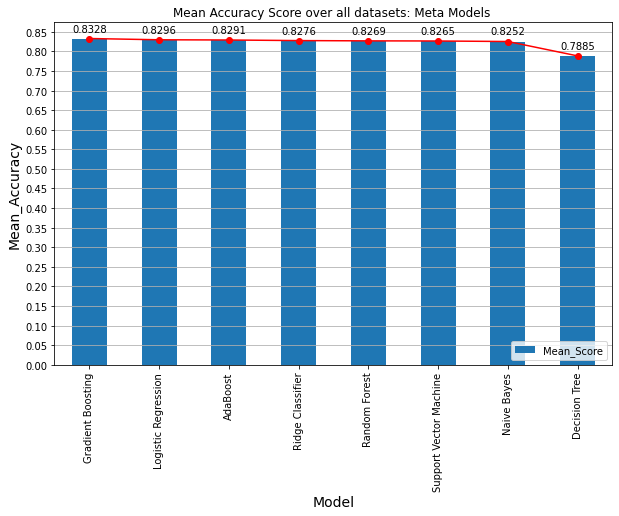

In [322]:
df1 = overall_model_eval.sort_values(by='Mean_Score',ascending=False)
#df1['Mean_Score']=df1['Mean_Score']-.8
ax = df1.plot(x="Model", y=["Mean_Score"],kind="bar",figsize=(10,6.3))
#ax = result_ensembles.sort_values(by='Avg_accuracy',ascending=False).plot(x="Ensemble", y=["Avg_accuracy"],kind="bar",figsize=(14,6.5))
#ax.legend(["Log_reg_meta","GBoost_meta","VADER","TextBlob","Flair","BERT"],loc = 'upper left',fontsize=11)
ax.set_xlabel('Model', fontsize=14)  # Change label and font size
ax.set_ylabel('Mean_Accuracy', fontsize=14)  # Change label and font size
ax.set_title('Mean Accuracy Score over all datasets: Meta Models ')
y_ticks = [(i*.05) for i in range(0,20)]
ax.set_yticks(y_ticks)
ax.yaxis.grid(True)
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.plot(df1['Model'], df1['Mean_Score'], color='red', marker='o')
ax.legend(loc='lower right')
# Increase font size of tick labels

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

In [320]:
overall_model_eval.head()

,Model,Mean_Score
0,AdaBoost,0.829069
1,Decision Tree,0.788461
2,Gradient Boosting,0.832845
3,Logistic Regression,0.829629
4,Naive Bayes,0.825215


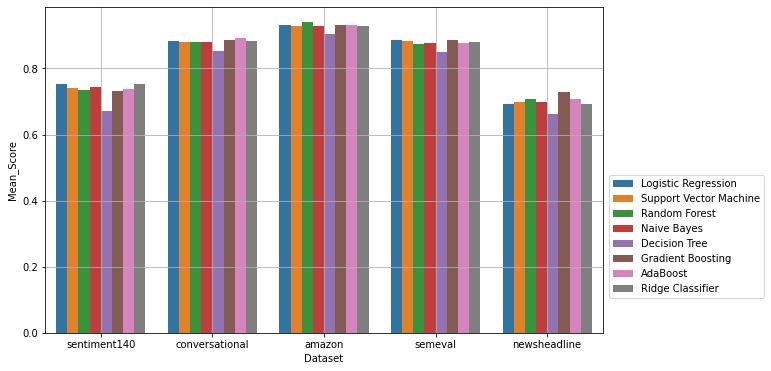

In [321]:
plt.figure(figsize=(10, 6)) 
sns.barplot(data =df_model_eval,hue ='Model',y='Mean_Score',x='Dataset' )
plt.legend(bbox_to_anchor=(1.15, .5), loc='upper center')
plt.grid(True)